# Example 2: binary classification

The goal is to assign the data $x$ to one of two discrete classes $y\in \{0, 1\}$. In this context, we refer to $y$ as a label.


We select the Bernoulli distribution, which is defined on the domain $\{0, 1\}$. This distribution has a single parameter $\lambda \in [0, 1]$ that represents the probability that $y=1$:

$$
p(y|\lambda) = (1-\lambda)^{1-y} \lambda^y
$$

We set the machine learning model to predict the single distribution parameter $\lambda$. However, $\lambda$ can only take values in the range $[0, 1]$, and we cannot guarantee that the network output will lie in this range. Consequently, we pass the network output through a function that maps the real numbers $\mathbb{R}$ to $[0, 1]$. A suitable function is the **logistic sigmoid**:
$$
\sigma(z) = \frac{1}{1+\exp(-z)}
$$

$$
\lambda = \sigma(f_\phi(x))
$$

The loss function is the negative log-likelihood of the training set
$$
\begin{align}
L(\phi) & = -\sum_{i=1}^{I}\log p(y_i|\sigma(f_\phi(x_i))) \\
& = -\sum_{i=1}^{I} (1-y_i)\log[(1-\sigma(f_\phi(x_i)))] + y_i \log[\sigma(f_\phi(x_i))]
\end{align}
$$

This is known as the **binary cross-entropy** loss.

The transformed model output $\lambda = \sigma(f_\phi(x))$ represents the probability that $y=1$, and it follows that $1-\lambda$ represents the probability that $y=0$. When we perform inference, we may want a point estimate of $y$, so we set $y=1$ if $\lambda > 0.5$ and $y=0$ otherwise.

## Data

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=100, shuffle=True, noise=0.1)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [ ]:
y

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

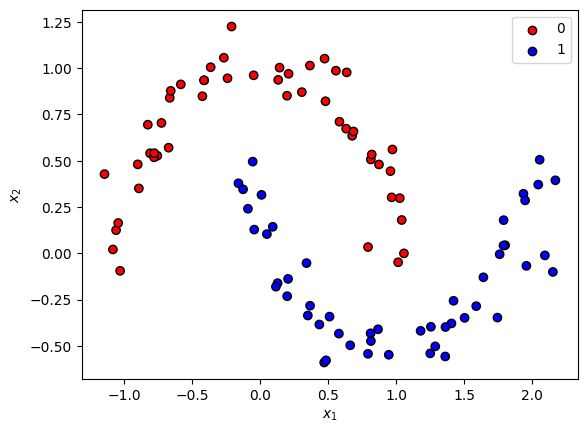

In [ ]:
cm_bright = ListedColormap(['red', 'blue'])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
plt.scatter([], [], c='red', label='0', edgecolors='k')
plt.scatter([], [], c='blue', label='1', edgecolors='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("Train")
print(X_train.shape)
print(y_train.shape)
print("Test")
print(X_test.shape)
print(y_test.shape)

Train
(80, 2)
(80,)
Test
(20, 2)
(20,)


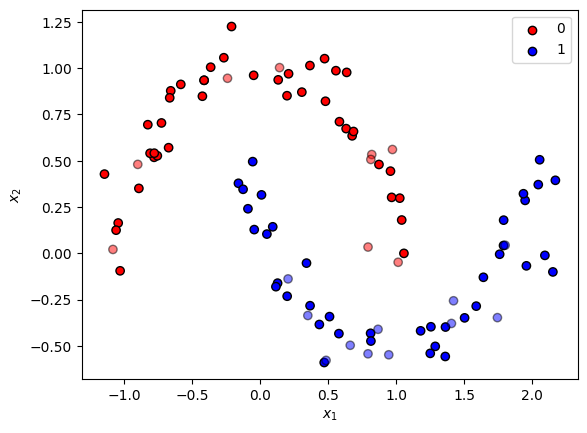

In [ ]:
cm_bright = ListedColormap(['red', 'blue'])

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5, edgecolors="k")
plt.scatter([], [], c='red', label='0', edgecolors='k')
plt.scatter([], [], c='blue', label='1', edgecolors='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

## Dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

class ClassificationDataset(Dataset):
    def __init__(self, n_samples=100, split='train'):
        X, y = make_moons(n_samples=n_samples, shuffle=True, noise=0.1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        if split == 'train':
            self.X = torch.tensor(X_train, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        elif split == 'test':
            self.X = torch.tensor(X_test, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
        else:
            raise ValueError("Invalid split. Use 'train' or 'test'.")

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_dataset = ClassificationDataset(split='train')
test_dataset = ClassificationDataset(split='test')

In [ ]:
len(train_dataset), len(test_dataset)

(80, 20)

In [ ]:
sample = train_dataset[0]
print(sample[0].shape)
print(sample[1].shape)
sample

torch.Size([2])
torch.Size([1])


(tensor([ 1.5434, -0.3678]), tensor([1.]))

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
batch = next(iter(train_dataloader))
print(batch[0].shape)
print(batch[1].shape)
batch

torch.Size([4, 2])
torch.Size([4, 1])


[tensor([[-1.0157,  0.0657],
         [-0.0996,  0.3436],
         [ 0.0822,  0.9338],
         [-0.0085,  0.2479]]),
 tensor([[0.],
         [1.],
         [0.],
         [1.]])]

## Model

In [ ]:
from torch import nn

In [ ]:
class BinaryClassifier(nn.Module):
    def __init__(self, num_features=2, use_sigmoid=True):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid() if use_sigmoid else nn.Identity()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = BinaryClassifier()
model(batch[0])

tensor([[0.5805],
        [0.5627],
        [0.5818],
        [0.5564]], grad_fn=<SigmoidBackward0>)

In [ ]:
model = BinaryClassifier(use_sigmoid=False)
model(batch[0])

tensor([[0.1124],
        [0.1882],
        [0.2293],
        [0.1829]], grad_fn=<AddmmBackward0>)

## BCELoss, BCEWithLogitsLoss

In neural networks, raw value that is later converted into a probability is called a logit.

- [What is a Logit?](https://www.youtube.com/watch?v=8ZcccMzTz7Y)
- [Logistic vs Logit Functions](https://www.youtube.com/watch?v=YaQEUgIr4Mk)
- [Odds and Log(Odds), Clearly Explained!!!](https://www.youtube.com/watch?v=ARfXDSkQf1Y)


- Cross entropy
  - $P$: target
  - $Q$: model

$$
H(P, Q) = -\sum_x P(x) \log Q(x)
$$

- Bernoulli distribution; $x \in [0, 1]$

$$
P(x) = (1-p)^{1-x} p^x
$$

$$
Q(x) = (1-q)^{1-x} q^x
$$

- Binary cross entropy
$$
H_\text{BCE}(p, q) = -[(1-p)\log(1-q) + p \log q]
$$

Therefore,

$$
\begin{align}
L(\phi) & = -\sum_{i=1}^{I} (1-y_i)\log[(1-\sigma(f_\phi(x_i)))] + y_i \log[\sigma(f_\phi(x_i))] \\
& = \sum_{i=1}^{I}H_\text{BCE}(y_i, \sigma(f_\phi(x_i)))
\end{align}
$$

$$
\frac{1}{I} \sum_{i=1}^{I}H_\text{BCE}(y_i, \sigma(f_\phi(x_i))) = \text{nn.BCELoss}(\sigma(f_\phi(x)), y) = \text{nn.BCEWithLogitsLoss}(f_\phi(x), y)
$$
- https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
> BCEWithLogitsLoss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.

In [ ]:
sig = nn.Sigmoid()
bce = nn.BCELoss()
bce_logits = nn.BCEWithLogitsLoss()

In [ ]:
model = BinaryClassifier(use_sigmoid=False)
logits = model(batch[0])
logits.shape

torch.Size([4, 1])

In [ ]:
targets = batch[1]
targets.shape

torch.Size([4, 1])

In [ ]:
bce(sig(logits), targets)

tensor(0.6823, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
bce_logits(logits, targets)

tensor(0.6823, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [ ]:
-((1-targets)*torch.log(1-sig(logits)) + targets*torch.log(sig(logits))).mean()

tensor(0.6823, grad_fn=<NegBackward0>)

## Training

In [ ]:
from torch import optim

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
model = BinaryClassifier(use_sigmoid=True)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        x, y = batch

        probs = model(x)
        loss = criterion(probs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

Epoch [  0], Loss: 0.6482
Epoch [ 10], Loss: 0.1581
Epoch [ 20], Loss: 0.0622
Epoch [ 30], Loss: 0.0268
Epoch [ 40], Loss: 0.0128


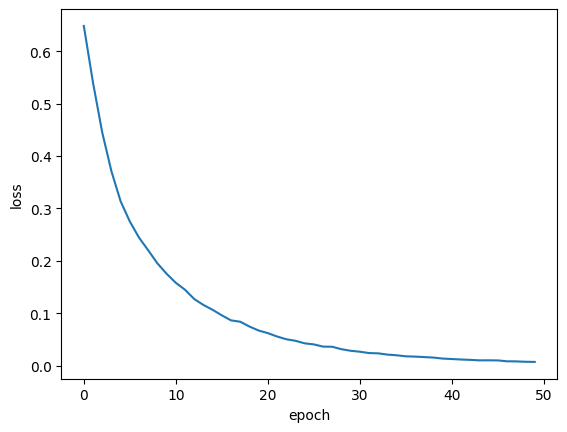

In [ ]:
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
X_test, y_test = test_dataset.X, test_dataset.y

with torch.inference_mode():
    pred_probs = model(X_test)

print(y_test)
print(pred_probs)
y_pred = (pred_probs > 0.5).float()
print(y_pred)

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.]])
tensor([[9.4263e-01],
        [3.0871e-02],
        [4.7530e-05],
        [1.0000e+00],
        [9.9922e-01],
        [7.9240e-03],
        [9.9722e-01],
        [9.9981e-01],
        [9.9988e-01],
        [5.7756e-01],
        [4.8185e-04],
        [9.9921e-01],
        [9.9990e-01],
        [2.9921e-04],
        [1.3410e-02],
        [1.3881e-04],
        [9.0494e-04],
        [9.9988e-01],
        [1.2048e-05],
        [9.9925e-01]])
tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.]

In [ ]:
accuracy = (y_pred == y_test).float().mean()
accuracy

tensor(0.9500)

torch.Size([10000, 2])
torch.Size([10000, 1])
torch.Size([100, 100])


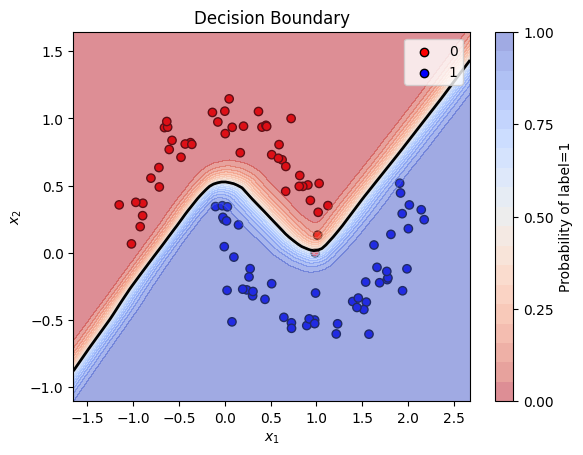

In [ ]:
X_train, y_train = train_dataset.X, train_dataset.y
X_test, y_test = test_dataset.X, test_dataset.y

X = torch.cat([X_train, X_test], dim=0)
y = torch.cat([y_train, y_test], dim=0)

x1_min = X[:, 0].min()-0.5
x1_max = X[:, 0].max()+0.5
x2_min = X[:, 1].min()-0.5
x2_max = X[:, 1].max()+0.5
x1, x2 = torch.meshgrid(torch.linspace(x1_min, x1_max, 100), torch.linspace(x2_min, x2_max, 100), indexing='ij')
grid_points = torch.cat([x1.reshape(-1, 1), x2.reshape(-1, 1)], dim=1)
print(grid_points.shape)

with torch.inference_mode():
    pred_probs = model(grid_points)

print(pred_probs.shape)
pred_probs = pred_probs.reshape(x1.shape)
print(pred_probs.shape)

cm_bright = ListedColormap(['red', 'blue'])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
plt.scatter([], [], c='red', label='0', edgecolors='k')
plt.scatter([], [], c='blue', label='1', edgecolors='k')
cf = plt.contourf(x1.numpy(), x2.numpy(), pred_probs.numpy(), levels=torch.linspace(0, 1, 20), cmap='coolwarm_r', alpha=0.5)
plt.contour(x1.numpy(), x2.numpy(), pred_probs.numpy(), levels=[0.5], colors='black', linewidths=2)  # Decision boundary
plt.title("Decision Boundary")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
cbar = plt.colorbar(cf, label="Probability of label=1")
cbar.set_ticks(torch.linspace(0, 1, 5))
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend()
plt.show()

## Summary

In [ ]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Data
class ClassificationDataset(Dataset):
    def __init__(self, n_samples=100, split='train'):
        X, y = make_moons(n_samples=n_samples, shuffle=True, noise=0.1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        if split == 'train':
            self.X = torch.tensor(X_train, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        elif split == 'test':
            self.X = torch.tensor(X_test, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
        else:
            raise ValueError("Invalid split. Use 'train' or 'test'.")

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model
class BinaryClassifier(nn.Module):
    def __init__(self, num_features=2, use_sigmoid=True):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid() if use_sigmoid else nn.Identity()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
def evaluate(model, train_dataset, test_dataset, model_use_sigmoid=True):
  X_train, y_train = train_dataset.X, train_dataset.y
  X_test, y_test = test_dataset.X, test_dataset.y

  sigmoid = nn.Sigmoid()

  # Test
  with torch.inference_mode():
      if model_use_sigmoid:
         pred_probs = model(X_test)
      else:
         pred_probs = sigmoid(model(X_test))
  y_pred = (pred_probs > 0.5).float()
  accuracy = (y_pred == y_test).float().mean()
  print(f"Accuracy: {accuracy*100:.0f} %")

  # Decision boundary
  X = torch.cat([X_train, X_test], dim=0)
  y = torch.cat([y_train, y_test], dim=0)

  x1_min = X[:, 0].min()-0.5
  x1_max = X[:, 0].max()+0.5
  x2_min = X[:, 1].min()-0.5
  x2_max = X[:, 1].max()+0.5
  x1, x2 = torch.meshgrid(torch.linspace(x1_min, x1_max, 100), torch.linspace(x2_min, x2_max, 100), indexing='ij')
  grid_points = torch.cat([x1.reshape(-1, 1), x2.reshape(-1, 1)], dim=1)
  with torch.inference_mode():
      if model_use_sigmoid:
         pred_probs = model(grid_points)
      else:
         pred_probs = sigmoid(model(grid_points))
  pred_probs = pred_probs.reshape(x1.shape)
  cm_bright = ListedColormap(['red', 'blue'])
  plt.figure()
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
  plt.scatter([], [], c='red', label='0', edgecolors='k')
  plt.scatter([], [], c='blue', label='1', edgecolors='k')
  cf = plt.contourf(x1.numpy(), x2.numpy(), pred_probs.numpy(), levels=torch.linspace(0, 1, 20), cmap='coolwarm_r', alpha=0.5)
  plt.contour(x1.numpy(), x2.numpy(), pred_probs.numpy(), levels=[0.5], colors='black', linewidths=2)  # Decision boundary
  plt.title("Decision Boundary")
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  cbar = plt.colorbar(cf, label="Probability of label=1")
  cbar.set_ticks(torch.linspace(0, 1, 5))
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.legend()
  plt.show()

### BCELoss

Epoch [  0], Loss: 0.6592
Epoch [ 10], Loss: 0.2322
Epoch [ 20], Loss: 0.1485
Epoch [ 30], Loss: 0.0882
Epoch [ 40], Loss: 0.0465


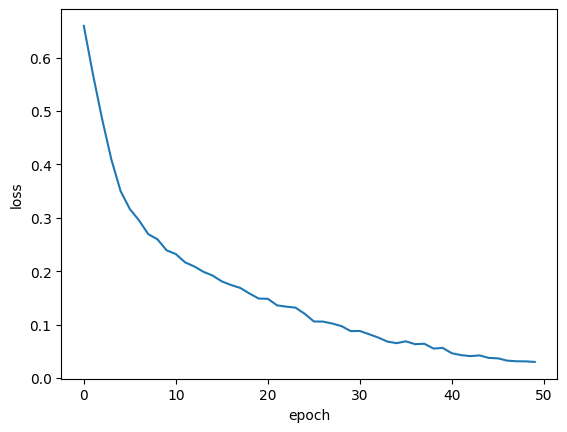

Accuracy: 95 %


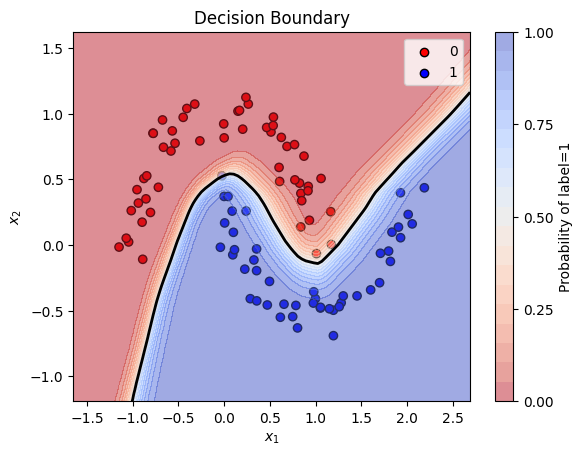

In [ ]:
# Dataset
train_dataset = ClassificationDataset(split='train')
test_dataset = ClassificationDataset(split='test')

# DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Model with sigmoid + BCELoss
model = BinaryClassifier(use_sigmoid=True)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        x, y = batch

        probs = model(x)
        loss = criterion(probs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

# Loss curve
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

evaluate(model, train_dataset, test_dataset, model_use_sigmoid=True)

### BCEWithLogitsLoss

Epoch [  0], Loss: 0.6250
Epoch [ 10], Loss: 0.1796
Epoch [ 20], Loss: 0.0840
Epoch [ 30], Loss: 0.0340
Epoch [ 40], Loss: 0.0153


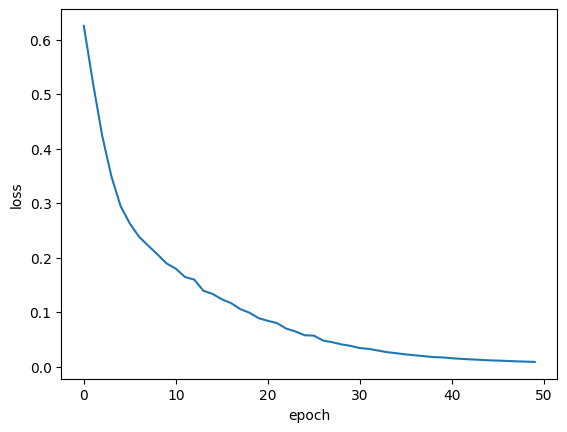

Accuracy: 95 %


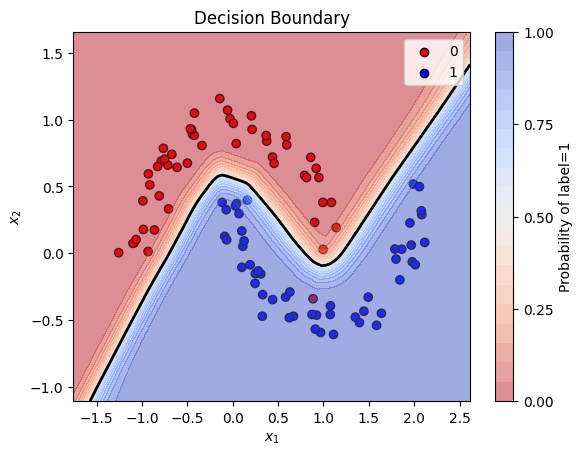

In [ ]:
# Dataset
train_dataset = ClassificationDataset(split='train')
test_dataset = ClassificationDataset(split='test')

# DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Model without sigmoid + BCEWithLogitsLoss
model = BinaryClassifier(use_sigmoid=False)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        x, y = batch

        probs = model(x)
        loss = criterion(probs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

# Loss curve
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

evaluate(model, train_dataset, test_dataset, model_use_sigmoid=False)

## PyTorch Lightning

In [ ]:
!pip install -qq lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 37.9 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import lightning as L
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import CSVLogger

# Data
class ClassificationDataset(Dataset):
    def __init__(self, n_samples=100, split='train'):
        X, y = make_moons(n_samples=n_samples, shuffle=True, noise=0.1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        if split == 'train':
            self.X = torch.tensor(X_train, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        elif split == 'test':
            self.X = torch.tensor(X_test, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
        else:
            raise ValueError("Invalid split. Use 'train' or 'test'.")

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model
class BinaryClassifier(nn.Module):
    def __init__(self, num_features=2, use_sigmoid=True):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid() if use_sigmoid else nn.Identity()
        )

    def forward(self, x):
        return self.model(x)

# LightningDataModule
class LiTClassificationDataModule(L.LightningDataModule):
    def __init__(self, batch_size=4):
        super().__init__()
        self.batch_size = batch_size

    def setup(self, stage):
        if stage == 'fit':
          self.train_dataset = ClassificationDataset(split='train')

        if stage == 'test':
          self.test_dataset = ClassificationDataset(split='test')

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, shuffle=False)

# LightningModule
class LiTBinaryClassifier(L.LightningModule):
    def __init__(self, use_sigmoid=True, lr=0.001):
        super().__init__()
        self.save_hyperparameters()

        self.model = BinaryClassifier(use_sigmoid=use_sigmoid)
        self.lr = lr

        if use_sigmoid:
            self.criterion = nn.BCELoss()
        else:
            self.criterion = nn.BCEWithLogitsLoss()
            self.sig = nn.Sigmoid()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y_true = batch
        preds = self(x)
        loss = self.criterion(preds, y_true)
        self.log("train/loss", loss, prog_bar=True, on_epoch=True, on_step=False)
        return loss

    def test_step(self, batch, batch_idx):
        x, y_true = batch
        preds = self(x)
        loss = self.criterion(preds, y_true)

        if self.hparams.use_sigmoid:
            y_pred = (preds > 0.5).float()
        else:
            y_pred = (self.sig(preds) > 0.5).float()
        accuracy = (y_pred == y_true).float().mean()

        test_metrics = {
            'test/loss': loss,
            'test/accuracy': accuracy
        }
        self.log_dict(test_metrics)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

In [ ]:
# Data, Model
dm = LiTClassificationDataModule()
model_lit = LiTBinaryClassifier(use_sigmoid=True, lr=0.001)

# Trainer
callbacks = [
    ModelCheckpoint(save_top_k=1, mode="min", monitor="train/loss"),
]
logger = CSVLogger(save_dir="logs/", name="binarycls")

trainer = L.Trainer(
    max_epochs=50,
    callbacks = callbacks,
    logger = logger
)

# Training
trainer.fit(model_lit, dm)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | BinaryClassifier | 4.4 K  | train
1 | criterion | BCELoss          | 0      | train
-------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     |

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=50` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:
trainer.logger.log_dir

'logs/binarycls/version_4'

In [ ]:
import pandas as pd

In [ ]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
metrics.tail()

,epoch,step,train/loss
45,45,919,0.037592
46,46,939,0.036700
47,47,959,0.034163
48,48,979,0.032773
49,49,999,0.030516


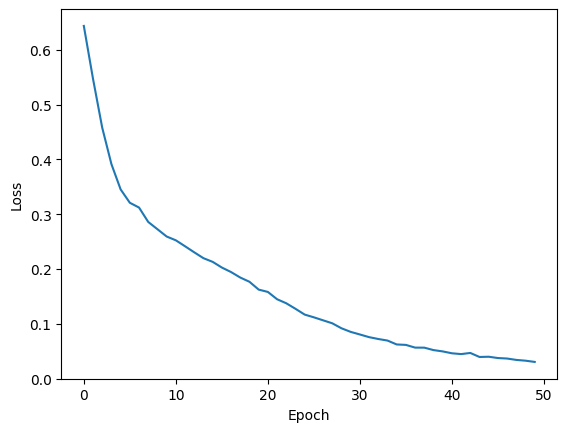

In [ ]:
metrics["train/loss"].plot(xlabel="Epoch", ylabel="Loss");

In [ ]:
trainer.test(model_lit, dm)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test/accuracy       │            1.0            │
│         test/loss         │   0.010005411691963673    │
└───────────────────────────┴───────────────────────────┘

[{'test/loss': 0.010005411691963673, 'test/accuracy': 1.0}]

In [ ]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
metrics.tail()

,epoch,step,test/accuracy,test/loss,train/loss
46,46,939,NaN,NaN,0.036700
47,47,959,NaN,NaN,0.034163
48,48,979,NaN,NaN,0.032773
49,49,999,NaN,NaN,0.030516
50,50,1000,1.0,0.010005,NaN
